In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [185]:
qx = pd.read_excel("./bd2013.xlsx")

In [186]:
print(qx[:2])
print(qx.shape)

  prov  citycode cityname  点位代码   sitecode sitename  years  months  days  \
0  NaN    130600       保定    51  130600051      胶片厂   2013       1     1   
1  NaN    130600       保定    51  130600051      胶片厂   2013       1     2   

    so2  no   no2  nox   pm10      co    o3  o38h   pm25      DATES  
0  62.0 NaN  45.0  NaN  264.0  1.9844  78.0  72.0  123.0 2013-01-01  
1  95.0 NaN  41.0  NaN  123.0  1.2552  84.0  72.0   87.0 2013-01-02  
(2183, 19)


In [187]:
data = qx.iloc[:,[5,9,11,13,14,15,17]]
# print(data[0])
# data.isnull().any()
print(data[:2])
data[data.isnull().values==True]

  sitename   so2   no2   pm10      co    o3   pm25
0      胶片厂  62.0  45.0  264.0  1.9844  78.0  123.0
1      胶片厂  95.0  41.0  123.0  1.2552  84.0   87.0


,sitename,so2,no2,pm10,co,o3,pm25
62,地表水厂,242.0,78.0,263.0,4.8178,NaN,145.0
63,地表水厂,316.0,54.0,145.0,3.4281,NaN,104.0
64,地表水厂,236.0,82.0,285.0,4.0528,NaN,191.0
65,地表水厂,422.0,116.0,449.0,4.6086,NaN,307.0
66,地表水厂,698.0,143.0,NaN,8.4034,NaN,451.0
66,地表水厂,698.0,143.0,NaN,8.4034,NaN,451.0
67,地表水厂,383.0,151.0,716.0,10.7401,NaN,534.0
68,地表水厂,580.0,156.0,800.0,10.6289,NaN,547.0
69,地表水厂,385.0,116.0,402.0,7.2662,NaN,321.0
70,地表水厂,279.0,100.0,385.0,5.8222,NaN,255.0


In [188]:
data.isnull()#是缺失值返回True，否则范围False
print(data.isnull().sum())#返回每列包含的缺失值的个数
print(data.shape)
data = data.dropna()#直接删除含有缺失值的行
print(data.isnull().sum())#返回每列包含的缺失值的个数
print(data.shape)

sitename     0
so2         56
no2         53
pm10        57
co          82
o3          65
pm25        56
dtype: int64
(2183, 7)
sitename    0
so2         0
no2         0
pm10        0
co          0
o3          0
pm25        0
dtype: int64
(2004, 7)


In [189]:
# print(data)
data_2 = []
print(data.shape)
data_1 = data.values

for data0 in data_1:
    if (data0[1]!=-99)and(data0[2]!=-99)and(data0[3]!=-99)and(data0[4]!=-99)and(data0[5]!=-99)and(data0[6]!=-99):
        data_2.append(data0)
# print(data_2)
data_3 = np.array(data_2) 
print(data_3)
print(data_3.shape)

(2004, 7)
[['胶片厂' 62.0 45.0 ..., 1.9844 78.0 123.0]
 ['胶片厂' 95.0 41.0 ..., 1.2552 84.0 87.0]
 ['胶片厂' 100.0 68.0 ..., 2.9792 76.0 172.0]
 ..., 
 ['游泳馆' 126.0 64.0 ..., 1.7 70.0 69.0]
 ['游泳馆' 132.0 65.0 ..., 1.9 81.0 62.0]
 ['游泳馆' 74.0 48.0 ..., 1.3 81.0 48.0]]
(1617, 7)


In [190]:
print(data_3.shape)
print(data_3)
print(data_3[:,1])

(1617, 7)
[['胶片厂' 62.0 45.0 ..., 1.9844 78.0 123.0]
 ['胶片厂' 95.0 41.0 ..., 1.2552 84.0 87.0]
 ['胶片厂' 100.0 68.0 ..., 2.9792 76.0 172.0]
 ..., 
 ['游泳馆' 126.0 64.0 ..., 1.7 70.0 69.0]
 ['游泳馆' 132.0 65.0 ..., 1.9 81.0 62.0]
 ['游泳馆' 74.0 48.0 ..., 1.3 81.0 48.0]]
[62.0 95.0 100.0 ..., 126.0 132.0 74.0]


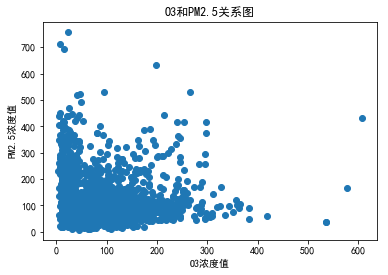

In [191]:
# 制图对比每个特征和PM2.5的关系
from matplotlib import pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(data_3[:,5],data_3[:,6])
plt.xlabel("O3浓度值")
plt.ylabel("PM2.5浓度值",rotation=90)
plt.title("O3和PM2.5关系图")
plt.show()


In [192]:
x_train = data_3[:,[1,2,3,4,5]]
print(x_train.shape)
y_train = data_3[:,6]
print(y_train.shape)

(1617, 5)
(1617,)


In [193]:
# 标准化
std_x = StandardScaler()
x_train= std_x.fit_transform(x_train)
print(x_train)
print(x_train.shape)
std_y = StandardScaler()
y_train= std_x.fit_transform(y_train.reshape(-1, 1))
print(y_train)
print(y_train.shape)

[[ 0.01643477 -0.20879926  0.44201855 -0.17756386 -0.18040982]
 [ 0.4715928  -0.34089462 -0.65789278 -0.59288218 -0.10053244]
 [ 0.54055614  0.55074907  0.63703829  0.38902783 -0.20703562]
 ..., 
 [ 0.8991655   0.41865371  0.01297513 -0.33954484 -0.286913  ]
 [ 0.9819215   0.45167755  0.15338934 -0.22563417 -0.14047113]
 [ 0.18194678 -0.10972774  0.23139724 -0.56736619 -0.14047113]]
(1617, 5)
[[-0.01991448]
 [-0.41491344]
 [ 0.517723  ]
 ..., 
 [-0.61241292]
 [-0.68921827]
 [-0.84282898]]
(1617, 1)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [194]:
# 划分数据集和测试集
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.25,random_state=1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1212, 5) (1212, 1)
(405, 5) (405, 1)


In [195]:
# 预测
from sklearn.neural_network import MLPRegressor
net = MLPRegressor(hidden_layer_sizes=(100,20,90))
net.fit(x_train,y_train)
print("神经网络训练集准确率：",net.score(x_train,y_train))
print("神经网络测试集准确率：",net.score(x_test,y_test))
print(net)

神经网络训练集准确率： 0.843354109964
神经网络测试集准确率： 0.847620807697
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 20, 90), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [196]:
from sklearn.ensemble import RandomForestRegressor
randforst = RandomForestRegressor(max_depth=9,min_samples_leaf=15,random_state=0)
randforst.fit(x_train,y_train)
print("随机森林训练集准确率：",randforst.score(x_train,y_train))
print("随机森林测试集准确率：",randforst.score(x_test,y_test))
print(randforst)

随机森林训练集准确率： 0.853006615855
随机森林测试集准确率： 0.823586581005
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
